<a href="https://colab.research.google.com/github/jihyunjeongme/data-science/blob/master/5%EC%9E%A5_%EC%9A%B0%EB%A6%AC%EB%82%98%EB%9D%BC_%EC%9D%B8%EA%B5%AC_%EC%86%8C%EB%A9%B8_%EC%9C%84%EA%B8%B0_%EC%A7%80%EC%97%AD_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-1 목표 명확히 하기

---

이상호 한국고용정보원 연구원의 <한국의 지방소멸에 관한 7가지 분석> 이라는 보고서에서 사용한 방법으로, 인구 소멸 지역의 정의를 65세 이상 노인 인구와 20~39세 여성 인구를 비교해서 젋은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 유ㅣ험 지역으로 분류하는 방법


# 5-1 인구 데이터 확보하고 정리하기

---

KOSIS 국가통계 포털 > 인구 가구 > 인구 부문 > 총조사 인구촐과 > 총조사인구 > 성 연령 및 세대구성별 인구 - 시군구
- 여기서는 github에서 공유하는 데이터로 사용합니다.
  - https://github.com/PinkWink/DataScience/tree/master/data

In [64]:

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/datascience/5. population_risk

/content/gdrive/My Drive/Colab Notebooks/datascience/5. population_risk


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 먼저 header=1을 통해서 두번째 줄부터 읽어야 하고
population = pd.read_excel('./05. population_raw_data.xlsx', header=1)

# 빈 셀에 대해 NaN 처리를 하지 않고 그 앞 내용으로 채우도록 합니다. 
population.fillna(method='pad', inplace=True)

population.rename(columns = {'행정구역(동읍면)별(1)': '광역시도',
                              '행정구역(동읍면)별(2)': '시도',
                              '계': '인구수'}, inplace=True)

# 그리고 소계라는 상목도 삭제했습니다.
population = population[(population['시도'] != '소계')]

population

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
11,서울특별시,중구,여자인구수 (명),63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0
12,서울특별시,용산구,총인구수 (명),230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0
13,서울특별시,용산구,남자인구수 (명),111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0
14,서울특별시,용산구,여자인구수 (명),118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0
15,서울특별시,성동구,총인구수 (명),299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0


In [0]:
population.is_copy = False

# 원래 '항목'으로 되어 있던 컬럼을 '구분' 으로 바꾸고
population.rename(columns = {'항목':'구분'}, inplace=True)

# '총인구수(명)'와 같이 긴 이림을 간단하게 '합계','남자', '여자'로 바꾸도록 합니다.
population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0


# 5-3 인구 소멸 위기 지역 계산하고 데이터 정리하기

---

인구 소멸 위기 지역을 알기 위해서는 먼저 20-30대의 인구, 65세 이상 인구수을 알아야 합니다.

In [0]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']


population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                        population['75 - 79세'] + population['80 - 84세'] + \
                        population['85 - 89세'] + population['90 - 94세'] + \
                        population['95 - 99세'] + population['100+']

population.head(10)
                        


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


In [0]:
# 합계, 남자, 여자로 되어 있는 구분 정리
# pivot_table로 쉽게 정리

pop = pd.pivot_table(population,
                    index = ['광역시도', '시도'],
                    columns = ['구분'],
                     values = ['인구수', '20-39세', '65세이상'])
pop
                              

20-39세                      ...       인구수                     
구분               남자        여자        합계  ...        남자        여자         합계
광역시도 시도                                  ...                               
강원도  강릉시    26286.0   23098.0   49384.0  ...  106231.0  107615.0   213846.0
     고성군     4494.0    2529.0    7023.0  ...   15899.0   14215.0    30114.0
     동해시    11511.0    9753.0   21264.0  ...   47166.0   46131.0    93297.0
     삼척시     8708.0    7115.0   15823.0  ...   35253.0   34346.0    69599.0
     속초시     9956.0    8752.0   18708.0  ...   40288.0   41505.0    81793.0
     양구군     4368.0    2481.0    6849.0  ...   12918.0   11092.0    24010.0
     양양군     2916.0    2171.0    5087.0  ...   13838.0   13380.0    27218.0
     영월군     4025.0    3134.0    7159.0  ...   20652.0   19421.0    40073.0
     원주시    45755.0   43164.0   88919.0  ...  167854.0  170125.0   337979.0
     인제군     5512.0    3449.0    8961.0  ...   17677.0   15043.0    32720.0
     정선군     4138.0    3297.0    7435.0  ...   19975.0   18743.0    38718.0
     철원군     7918.0    4714.0   12632.0  ...   25429.0   22584.0    48013.0
     춘천시    37173.0   35422.0   72595.0  ...  138251.0  142456.0   280707.0
     태백시     5333.0    4643.0    9976.0  ...   23899.0   23171.0    47070.0
     평창군     4377.0    3585.0    7962.0  ...   22126.0   21192.0    43318.0
     홍천군     7900.0    6258.0   14158.0  ...   35738.0   34338.0    70076.0
     화천군     5397.0    2643.0    8040.0  ...   14554.0   11710.0    26264.0
     횡성군     4512.0    3789.0    8301.0  ...   23398.0   22593.0    45991.0
경기도  가평군     7024.0    5771.0   12795.0  ...   31981.0   30467.0    62448.0
     고양시   143723.0  145020.0  288743.0  ...  510923.0  528761.0  1039684.0
     과천시     8582.0    8315.0   16897.0  ...   31013.0   32765.0    63778.0
     광명시    49509.0   47807.0   97316.0  ...  168241.0  171243.0   339484.0
     광주시    49690.0   45073.0   94763.0  ...  168345.0  159378.0   327723.0
     구리시    27732.0   26941.0   54673.0  ...   96397.0   97366.0   193763.0
     군포시    43183.0   41049.0   84232.0  ...  141647.0  143243.0   284890.0
     권선구    60291.0   56279.0  116570.0  ...  180766.0  177627.0   358393.0
     기흥구    56866.0   58658.0  115524.0  ...  206316.0  210847.0   417163.0
     김포시    49921.0   49660.0   99581.0  ...  182597.0  180846.0   363443.0
     남양주시   87416.0   86835.0  174251.0  ...  330749.0  331405.0   662154.0
     단원구    49620.0   43619.0   93239.0  ...  161915.0  152087.0   314002.0
...             ...       ...       ...  ...       ...       ...        ...
충청남도 금산군     5448.0    4454.0    9902.0  ...   27558.0   27054.0    54612.0
     논산시    14111.0   11900.0   26011.0  ...   61724.0   61489.0   123213.0
     당진시    24970.0   19356.0   44326.0  ...   87388.0   79242.0   166630.0
     동남구    38023.0   35222.0   73245.0  ...  131135.0  127784.0   258919.0
     보령시    12314.0    9590.0   21904.0  ...   52521.0   51352.0   103873.0
     부여군     6822.0    5348.0   12170.0  ...   34837.0   35350.0    70187.0
     서북구    63523.0   57966.0  121489.0  ...  182987.0  176049.0   359036.0
     서산시    23700.0   19196.0   42896.0  ...   87770.0   83018.0   170788.0
     서천군     5219.0    4142.0    9361.0  ...   27539.0   28473.0    56012.0
     아산시    47643.0   42296.0   89939.0  ...  155692.0  147237.0   302929.0
     예산군     8450.0    6665.0   15115.0  ...   40827.0   40512.0    81339.0
     천안시   101546.0   93188.0  194734.0  ...  314122.0  303833.0   617955.0
     청양군     3207.0    2410.0    5617.0  ...   16389.0   16364.0    32753.0
     태안군     6956.0    5271.0   12227.0  ...   32260.0   31640.0    63900.0
     홍성군    11691.0   10428.0   22119.0  ...   49769.0   50202.0    99971.0
충청북도 괴산군     3606.0    2726.0    6332.0  ...   19773.0   19200.0    38973.0
     단양군     2907.0    2289.0    5196.0  ...   15362.0   15141.0    30503.0
     보은군     3097.0    2498.0    5595.0  ...   17093.0   17128.0    34221.0
     상당구    23359.0   21071.0   44430.0  ...   86804.0   8689

In [0]:
# 인구 소별 비율을 계산할수 있습니다.


pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                    ...       인구수                소멸비율
구분             남자       여자       합계  ...        여자        합계          
광역시도 시도                              ...                              
강원도  강릉시  26286.0  23098.0  49384.0  ...  107615.0  213846.0  1.226041
     고성군   4494.0   2529.0   7023.0  ...   14215.0   30114.0  0.707314
     동해시  11511.0   9753.0  21264.0  ...   46131.0   93297.0  1.289738
     삼척시   8708.0   7115.0  15823.0  ...   34346.0   69599.0  0.973990
     속초시   9956.0   8752.0  18708.0  ...   41505.0   81793.0  1.372647

[5 rows x 10 columns]

In [0]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                    ...       인구수      소멸비율 소멸위기지역
구분             남자       여자       합계  ...        합계                 
광역시도 시도                              ...                           
강원도  강릉시  26286.0  23098.0  49384.0  ...  213846.0  1.226041  False
     고성군   4494.0   2529.0   7023.0  ...   30114.0  0.707314   True
     동해시  11511.0   9753.0  21264.0  ...   93297.0  1.289738  False
     삼척시   8708.0   7115.0  15823.0  ...   69599.0  0.973990   True
     속초시   9956.0   8752.0  18708.0  ...   81793.0  1.372647  False

[5 rows x 11 columns]

In [0]:
# 소멸비율이 1 이하면 소멸위기지역이라고 기록합니다.

pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [0]:
# 해당리스트를 뽑았습니다. 총 83개 지자체 입니다.

In [0]:
pop.reset_index(inplace=True)
pop.head()

광역시도   시도   20-39세           ...       인구수                소멸비율 소멸위기지역
구분                 남자       여자  ...        여자        합계                 
0   강원도  강릉시  26286.0  23098.0  ...  107615.0  213846.0  1.226041  False
1   강원도  고성군   4494.0   2529.0  ...   14215.0   30114.0  0.707314   True
2   강원도  동해시  11511.0   9753.0  ...   46131.0   93297.0  1.289738  False
3   강원도  삼척시   8708.0   7115.0  ...   34346.0   69599.0  0.973990   True
4   강원도  속초시   9956.0   8752.0  ...   41505.0   81793.0  1.372647  False

[5 rows x 13 columns]

In [0]:
# pivot_tabler에 의해 다단으로 구성된 index를 다시 초기화합니다.

tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
                pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head()
               

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [0]:
# 다단으로 표시된 컬럼을 하나로 합칩니다.
# 이제 세로축에 지역, 가로축에 연령대별 혹은 성별 인구수가 정리되었습니다.

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
광역시도        264 non-null object
시도          264 non-null object
20-39세남자    264 non-null float64
20-39세여자    264 non-null float64
20-39세합계    264 non-null float64
65세이상남자     264 non-null float64
65세이상여자     264 non-null float64
65세이상합계     264 non-null float64
인구수남자       264 non-null float64
인구수여자       264 non-null float64
인구수합계       264 non-null float64
소멸비율        264 non-null float64
소멸위기지역      264 non-null bool
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [0]:
# 총 264개 항목에 인구수는 숫자형으로 잡혔고
# 소멸위기지역은 bool형 입니다.

## 대한민국 지도 그리는 방법
- 아래 Github에서 대한민국 시군구 단위로 구분된 json 파일을 얻을 수 있음.

- https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_municipalities_geo_simple.json


In [0]:
# 지역에 따른 고유ID가 필요

pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [0]:
# '광역시도'의 값과 '시도'의 값을 합침

si_name = [None] * len(pop)

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}


In [0]:
# 광역시가 아니면서 구를 가지고 있는 시와 그 행정구를 dict 형으로 선언
# 광역시, 특별시, 자치시로 끝나지 않으면 일반 시 혹은 군으로 봄
# 세종특별자치시를 그냥 세종으로 처리
# 나머지는 광역시도 앞 두 글자와 시도에서 두글자인 경우 모두, 아니면 앞 두글자만 선택하면서 고유ID 만듬

for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [0]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [0]:
pop['ID'] = si_name

In [0]:
# 결과를 pop에 포함시키고 이제 큰 의미가 없는 몇몇 컬럼을 제거

del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


In [65]:
# 대한민국의 각 지역을 엑셀에서 표현한 그림을 읽어옴

!ls

draw_korea_raw = pd.read_excel('05. draw_korea_raw (1).xlsx', encoding="EUC-KR")
                               

draw_korea_raw

'05. draw_korea.html'
'05. draw_korea_raw (1).xlsx'
'05. election_result.html'
'05. population_raw_data (1).xlsx'
'05. population_raw_data.xlsx'
'05. skorea_municipalities_geo_simple.json'
 skorea-municipalities-2018-topo-simple.json


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [66]:
# stack()으로 풀고, 인덱스를 재설정(reset_index), 그리고 다시 커럼이름을 바꿈

draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},
                              inplace=True)

draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [0]:
# 이제 각 지역에 대한 좌표를 얻음
# 철원은 (7.0) 지점

draw_korea = draw_korea_raw_stacked

In [0]:
# ID컬럼에서 지도에 표기할때 시 이름 구 이름으로 줄을 나누기 위해 분리

BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [72]:
# 한글폰트 설정

import matplotlib.font_manager as fm  # 폰트 관련 용도
%matplotlib inline


# 나눔 고딕 인스톨

!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

NanumMyeongjo


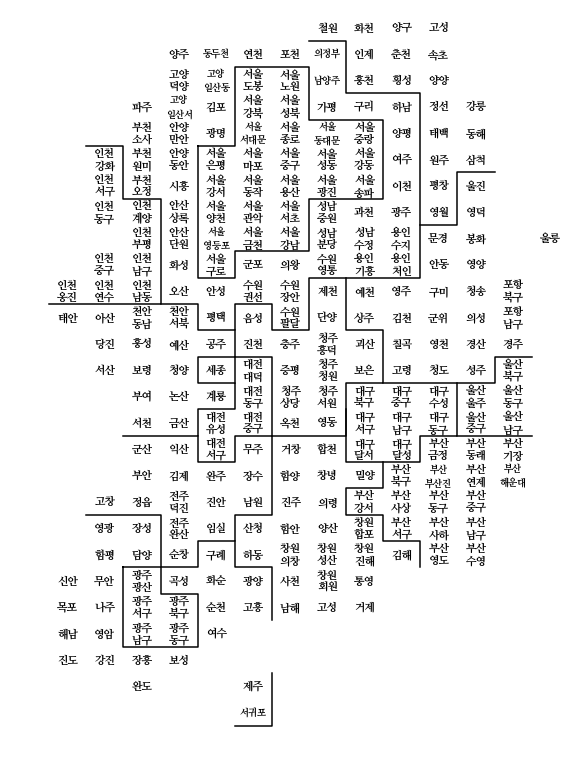

In [73]:
# 광역시도를 구분하는 경계선도 직접 입력

plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [0]:
# 위 코드는 경계선을 그립니다.
# 마지막 부분에 invert_yaxis()가 되어 있는 이유는 y축이 엑셀에서 0번이 시작하는 것과 
# matplotlib가 0이라고 인식하는 좌표가 서로 반대이기 때문.

In [75]:
# 원래 인구 현황을 가지고 있던 pop변수와 엑셀에서 출발해서 지도를 그리기 위해 만든 draw_korea 변수에서 
# 일반행정구를 가진 시(성남,수원등등)의 합계정보를 삭제

tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
  pop = pop.drop(pop[pop['ID']==tmp].index)
  

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
set()



set()


set()

In [76]:
# 그리고 두 변수(pop, draw+korea)를 merge 합니다

pop = pd.merge(pop, draw_korea,how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


In [0]:
# 이제 ID도, 각 지역별 좌표도 모두 확보
# 지도 그릴 준비가 다됨

In [0]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 인구 현황 및 인구 소멸 지역 확인

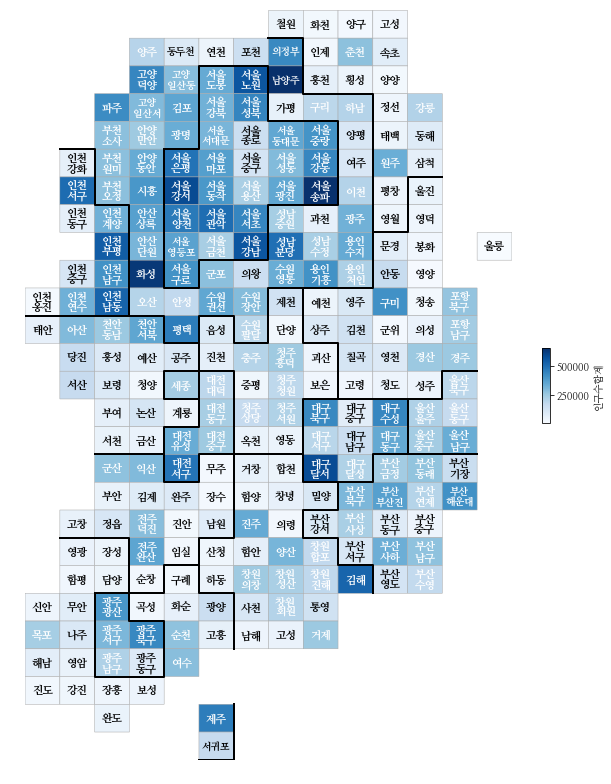

In [80]:
drawKorea('인구수합계', pop, 'Blues')

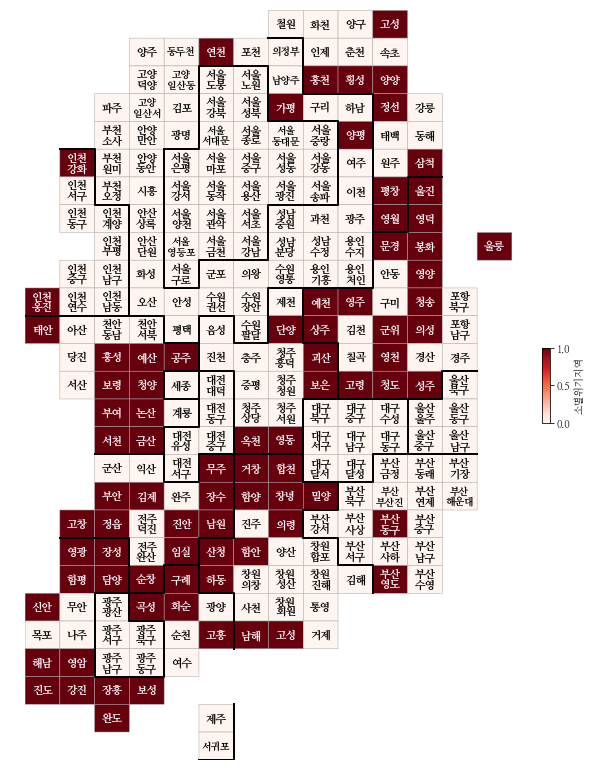

In [81]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

In [0]:
# 그림을 그리기 위해 bool형이었던 것을 1과 0으로 바꿨습니다.

## 인구 현황에서 여성 인구 비율 확인하기

In [0]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

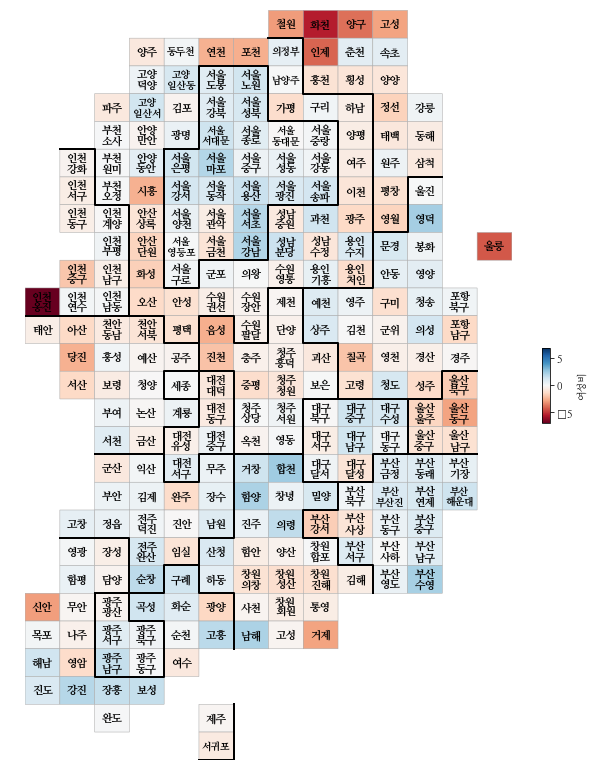

In [84]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비',pop, 'RdBu')
         
          

In [0]:
# 여성인구수와 합계를 알고 있어서 나눈 다음 0.5를 뺴는 작업
# 그래서 0이면 여성인구수가 50%
# RdBu 같은 설정을 사용하면 0을 기준으로 좌우가 다른 색상을 갖음
# 파란색이 여성비가 높음, 빨간색이 여성비가 낮음.

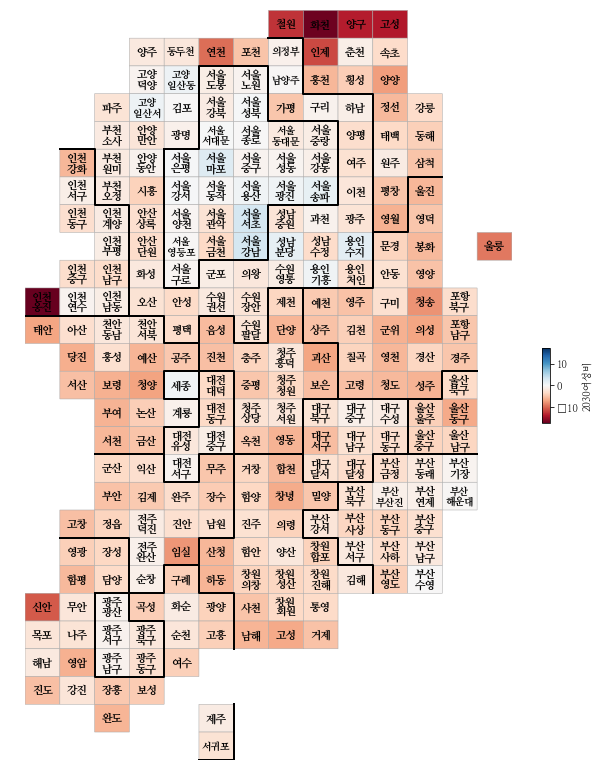

In [87]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5) * 100
drawKorea('2030여성비',pop, 'RdBu')

In [0]:
# 고령 여성 인구를 제외하고 나면 전국적으로 남성 인구 비율이 높음

## Folium에서 인구 소멸 위기 지역 표현하기

In [89]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [0]:
# 원래 pop 데이터에서 ID 커럼을 index로 설정합니다.
# 그래야 Folium에서 쉽게 인식합니다

import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:

geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [0]:
# 실제 우리나라의 민우 밀집 현상을 쉽게 확인 할 수 있습니다.

In [93]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [0]:
# 또한 인구 소멸 위기지역도 확인 했습니다.

In [0]:
draw_korea.to_csv('result_of_draw_korea.csv', encoding='utf-8', sep=',')